## Proyecto #1
# Regresión Lineal en Python
Jerson Ochoa Barillas

### 2. Usando slicing con Numpy separar los datos en 2 datasets: entrenamiento (80%) y validación y pruebas (20%).

In [54]:
# Importar librerías globales
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# Cargar los datos
data = np.load('./proyecto_data/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [5]:
# Averiguamos cuantas filas y columnas tiene el arreglo: 1460,6
data.shape


(1460, 6)

In [31]:
# Convertimos los datos en un DataFrame utilizando el snipet incluído en la información del proyecto para las columnas
# Se convierte en DataFrame para poder usar las funciones de pandas para hacer slicing
dfData = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dfData

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [32]:
# Dividimos los datos para entrenamiento y validación (80%) usando iloc de pandas
dataTraining = dfData.iloc[0:(int(len(data) * 0.8))]
dataTraining

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [33]:
# Dividimos los datos para pruebas (20%) usando iloc de pandas
dataTests = dfData.iloc[(int(len(data) * 0.8)):]
dataTests

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas):
- Media
- Valor máximo
- Valor mínimo
- Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- Desviación estándar

In [47]:
# Eliminamos valores nulos del dataframe para prevenir errores
dfData.fillna(0)
# Obtenemos las estadísticas con la función describe
dataStatisticsGeneral = dfData.describe()
# Aqui obtenemos promedio, maximo, mínimo, desviación estándar
dataStatistics = dataStatisticsGeneral.loc[["mean", "max", "min", "std"],:] 
dataStatistics

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752


In [48]:
# Aquí obtenemos rango pico a pico
rango = np.ptp(dfData.fillna(0), axis=0)
rango

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        313.0
dtype: float64

In [49]:
# Ajustamos el objeto rango para que los títulos se ajusten al df de estadísticas dandole la vuelta con la función transpose de pandas
rangoTranspose = pd.DataFrame(rango).transpose()
rangoTranspose

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,720100.0,9.0,4358.0,12.0,138.0,313.0


In [50]:
# Agregamos el rango al df de estadísticas usando la función concat de pandas
dataStatisticsGeneral = pd.concat([dataStatistics, rangoTranspose])
dataStatisticsGeneral

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
0,720100.000000,9.000000,4358.000000,12.000000,138.000000,313.000000


In [52]:
# Renombramos la fila de rango
dataStatisticsGeneral = dataStatisticsGeneral.rename(index={0: 'rank'})
dataStatisticsGeneral

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
rank,720100.000000,9.000000,4358.000000,12.000000,138.000000,313.000000


### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable

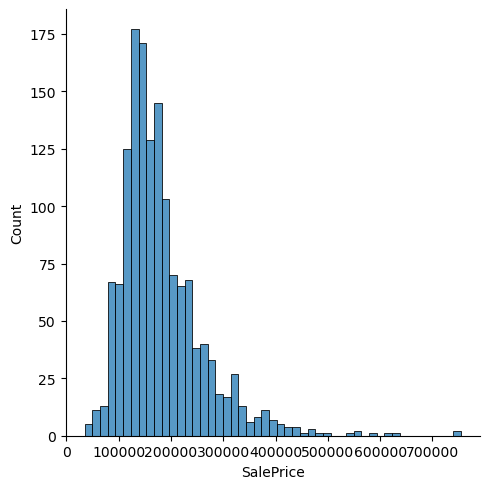

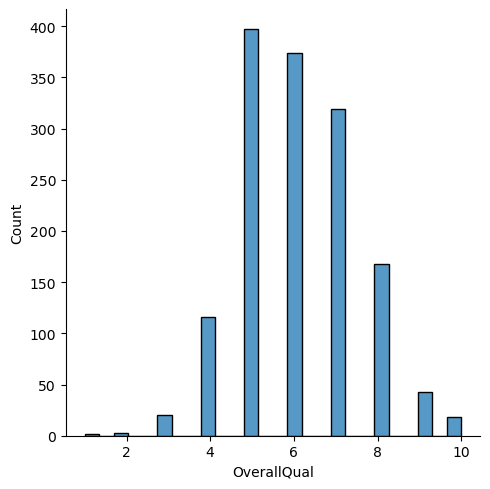

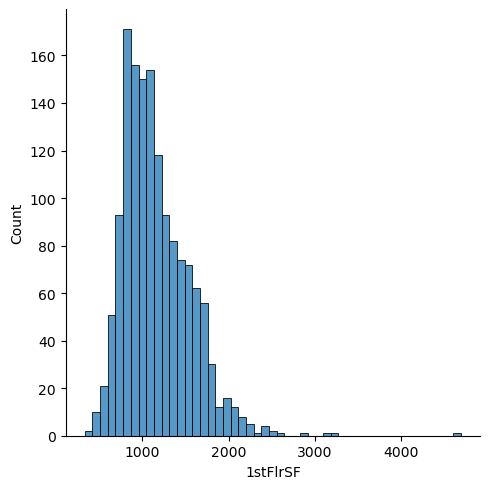

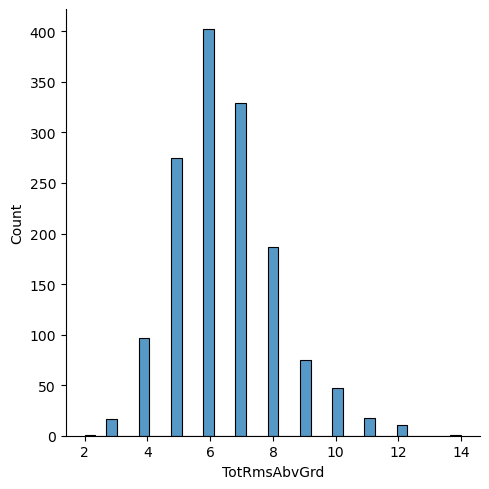

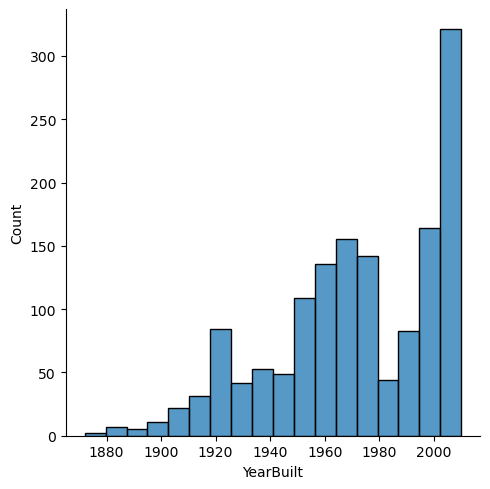

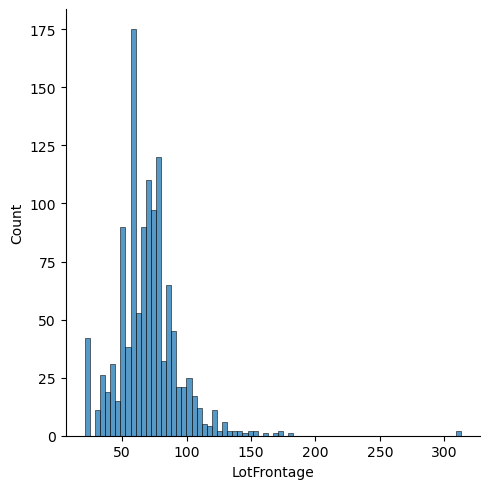

In [65]:
dfData.columns
for col in dfData.columns:
    sb.displot(dfData[col])

# Distplot se encuentra deprecado, en su lugar se utiliza la función displot

### 5. Para cada variable independiente x: 
- Calcular el coeficiente de correlación entre x y y
- Graficar x vs y (scatterplot) usando matplotlib
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica
- Basado en la gráfica y el coeficiente de correlación de cada par (x,y) elegir las 2 variables con más potencial predictivo, es decir, las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [78]:
# Calculamos coeficiente de correlación de cada columna usando método de Pearson
dictCorrelacion = dict()
auxDict = dict()
# Recorremos cada columna y guardamos sus resultados en un diccionario
for i in dfData.columns:
    auxDict = {}
    for j in dfData.columns:
        if (i != j):
            auxDict[j] = dfData[i].corr(dfData[j], method='pearson')
    dictCorrelacion[i] = auxDict
